# Tracés de graphes pour l'article

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from main2 import ConvexProximalMethod #ComputeGamma, ComputeGamma2, 
from mathutils import gaussian
import matplotlib.collections as mc
plt.rc('font', size=16)

In [2]:
def ConvexSpeed(max_attractiveness, reward_attractiveness, pen_distance, n_points, l_intervalle, n_peaks):
    x = np.linspace(0, l_intervalle, n_points)
    mu = np.ones(x.shape) / x.shape
    y =  np.linspace(0, l_intervalle, n_points) # TODO: tester avec x et y de taille différente 
    attract_y = gaussian(l_intervalle / 2, l_intervalle / 20, y)
    attract_y = max_attractiveness * attract_y / np.max(attract_y)
    districts = n_points / n_peaks
    capacity = np.where(np.logical_and((n_points * x / l_intervalle) % districts >= (districts/4), (n_points * x / l_intervalle) % districts <=(3*districts/4)), 1, 10 ** (-4))
    capacity = 2*capacity / np.sum(capacity)

    potential = reward_attractiveness * (1-attract_y).reshape(1, -1)#

    costs = pen_distance * (1 / l_intervalle ** 2) * (x.reshape(-1, 1) - y.reshape(1, -1)) ** 2 + np.tile(potential , (x.size, 1)) #np.where(gap_price_budget < 0, 0, pen_overcost * gap_price_budget) + np.tile(potential , (x.size, 1))

    plt.rc('font', size=16)

    fig2 = plt.figure(f"Gap", figsize=(15, 10))
    ax3 = fig2.add_subplot(111)

    fig1 = plt.figure(f"nu", figsize=(15, 10))
    ax1 = fig1.add_subplot(111)

    for eps in [5, 2, 1, 0.5, 0.2, 0.1, 0.05, 0.01]:
        print("EPS :", eps)
        method = ConvexProximalMethod(mu, costs, eps, capacity)
        gamma, nu, mem_nu, mem_gap= method.fit()
        ax3.plot(mem_gap, label=r"$\epsilon =$" + str(eps), linewidth=1.7)
        ax1.plot(y, nu * n_points / l_intervalle, label=r"$\epsilon =$"+ str(eps), linewidth=1.7)
    ax3.set_xlabel("Number of iterations")
    ax3.set_title("Evolution of the logarithm of the gap between two proximal steps")
    ax3.set_ylabel("logarithm of the gap between two proximal steps according to $\epsilon")
    ax3.legend(loc="upper right")
    ax3.legend()
    ax3.grid(True)
    
    ax1.set_xlabel("location y")
    ax1.set_title(r"Distribution $\nu$ according to $\epsilon$")
    ax1.set_ylabel("Density")
    ax1.legend(loc="upper right")
    ax1.legend()
    ax1.grid(True)

    plt.show()
    #return gamma, nu, mu, x, y, attract_y, capacity, costs


EPS : 5
gap : 203508.08409880754
gap : 0.4996538737683897
gap : 0.0001997033203163099
gap : 3.994464757791035e-08
EPS : 2
gap : 151058.759021017
gap : 0.49987859203138585
gap : 0.00019988291384378588
gap : 3.998058269097889e-08
EPS : 1
gap : 94817.63921696051
gap : 0.5020939312688857
gap : 0.00368921750222512
gap : 0.00029696653330904934
gap : 2.3823589867719393e-05
gap : 1.9106813167572176e-06
gap : 1.5323564239518564e-07
EPS : 0.5
gap : 42747.08546369821
gap : 0.5182212108024637
gap : 0.13078593835671742
gap : 0.04265728162001212
gap : 0.014065591478256522
gap : 0.0045721063631561434
gap : 0.0015357975359013832
gap : 0.0005175919504152224
gap : 0.00017426040993781652
gap : 5.86490436846876e-05
gap : 1.9736628753275494e-05
gap : 6.641529797043206e-06
gap : 2.234897435084387e-06
gap : 7.520473006133301e-07
EPS : 0.2
gap : 11620.662918262215
gap : 0.7250303024000035
gap : 0.4996440004404097
gap : 0.33808072281756074
gap : 0.20635024713491287
gap : 0.1055489583508635
gap : 0.048053678948

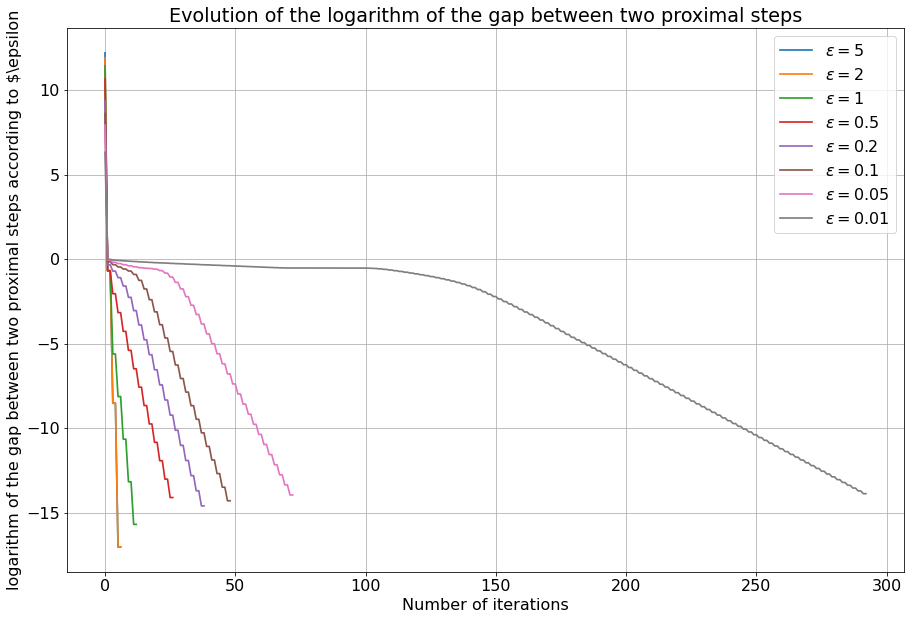

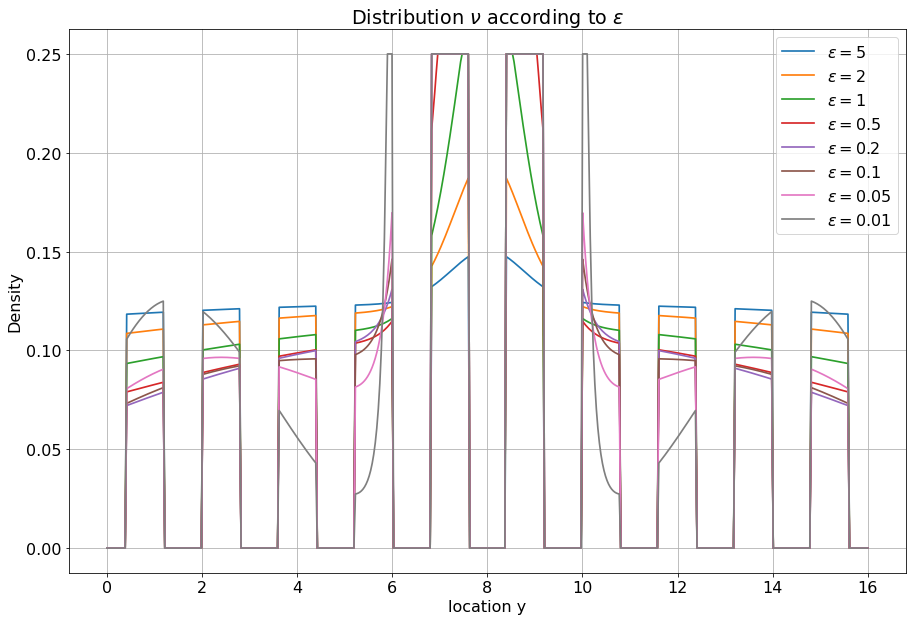

In [3]:
N_POINTS = 500
L_INTERVALLE =16
EPS = 0.1
PEN_DISTANCE = 1
PEN_DENSITY = 2 #10 ** 4 ## MAX=10
MAX_ATTRACTIVENESS = 1
REWARD_ATTRACTIVENESS = 1
N_PEAKS=10

ConvexSpeed(MAX_ATTRACTIVENESS, REWARD_ATTRACTIVENESS, PEN_DISTANCE, N_POINTS, L_INTERVALLE, N_PEAKS)


NameError: name 'y' is not defined

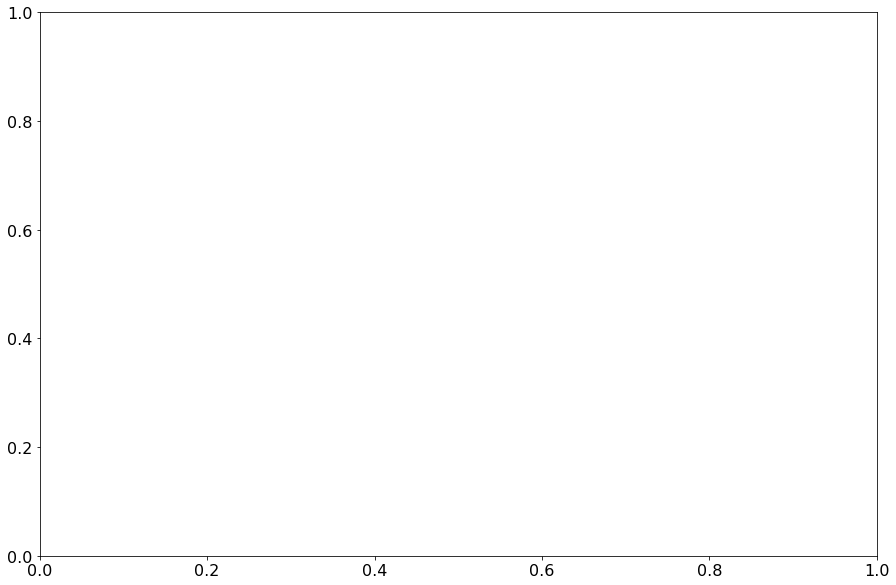

In [4]:
fig1 = plt.figure(f"Solution finale", figsize=(15, 10))
ax1 = fig1.add_subplot(111)


color1 = "blue"
ax1.plot(y, nu * N_POINTS / L_INTERVALLE, label="nu", color=color1, linewidth=1.7)
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xlabel(r"$p_{dens} = $" + f"{PEN_DENSITY}")
ax1.set_ylabel("density", color=color1)

color2 = "forestgreen"
ax2 = ax1.twinx()
ax2.plot(y, attract_y, label="attractiveness", color=color2, linewidth=1.7)
ax2.set_ylabel('attractiveness', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
fig1.tight_layout()

In [4]:
def ComputeGamma(max_attractiveness, reward_attractiveness, pen_overcost, pen_density, pen_distance, n_points, epsilon, l_intervalle):
    x = np.linspace(0, 1, n_points)
    # mu = gaussian(MU_1, SIGMA_1, x) + gaussian(MU_2, SIGMA_2, x)
    # mu = (mu / np.linalg.norm(mu, ord=1))

    mu = np.ones(x.shape) / x.shape

    y =  np.linspace(0, l_intervalle, n_points) # TODO: tester avec x et y de taille différente
    attract_y = gaussian(l_intervalle / 2, l_intervalle / 20, y)#gaussian(MU_1, SIGMA_1, y) + gaussian(MU_2, SIGMA_2, y)
    attract_y = max_attractiveness * attract_y / np.max(attract_y)
    
    potential = reward_attractiveness * (1-attract_y).reshape(1, -1)
    phi = pen_distance * (y.T - y) ** 2

    gap_price_budget = attract_y.reshape(1, -1) - x.reshape(-1, 1)
#    costs = np.where(gap_price_budget < 0, (1 - reward_attractiveness) * attract_y, (1 - reward_attractiveness) * attract_y + pen_overcost * gap_price_budget)

    costs = np.where(gap_price_budget < 0, 0, pen_overcost * gap_price_budget) + np.tile(potential , (x.size, 1))
    def E(nu, phi):
        return np.sum(pen_density * (nu ** 3) + 0.5 * nu.T @ phi @ nu + potential)

    #+ np.tile(potential, (x.size, 1))
    def h_G2(nu): # fonction issue du potentiel
        return 3 * pen_density * (nu ** 2)
    
    def hprim_G2(nu):
        return 6 * pen_density * nu#56 * (nu ** 6)

    method = SemiImplicitMethod(mu, costs, phi, epsilon, h_G2, hprim_G2, E)
    gamma, nu = method.fit()
    return gamma, nu, mu, x, y, attract_y, costs, phi

## Lancer d'une seule modélisation

In [5]:
N_POINTS = 500
L_INTERVALLE =16
EPS = 1
PEN_OVERCOST = 10
PEN_DENSITY = 0
PEN_DISTANCE = 0
MAX_ATTRACTIVENESS = 1
REWARD_ATTRACTIVENESS = 1

gamma, nu, mu, x, y, attract_y, costs, phi = ComputeGamma(MAX_ATTRACTIVENESS, REWARD_ATTRACTIVENESS, PEN_OVERCOST, PEN_DENSITY, PEN_DISTANCE, N_POINTS, EPS, L_INTERVALLE)

#gamma, nu, mu, x, y, costs, phi = ComputeGamma2(PEN_MOBILITY, PEN_DENSITY, PEN_DISTANCE, N_POINTS, EPS, L_INTERVALLE)

ITER 1
1
evol 187.76937858285837
2
evol 0.0
3
evol 1.3848634101518692e-19
4
evol 0.0
5
evol 8.233498153901819e-20
6
evol 0.0
gap 2 0.7573015086586216
ITER 2
1
evol 187.76937858285837
2
evol 0.0
3
evol 1.3848634101518692e-19
4
evol 0.0
5
evol 8.233498153901819e-20
6
evol 0.0
gap 2 0.0


In [6]:
np.sum(gamma), np.max(np.sum(gamma, axis=1) - mu)

(0.9999999999999999, 8.673617379884035e-19)

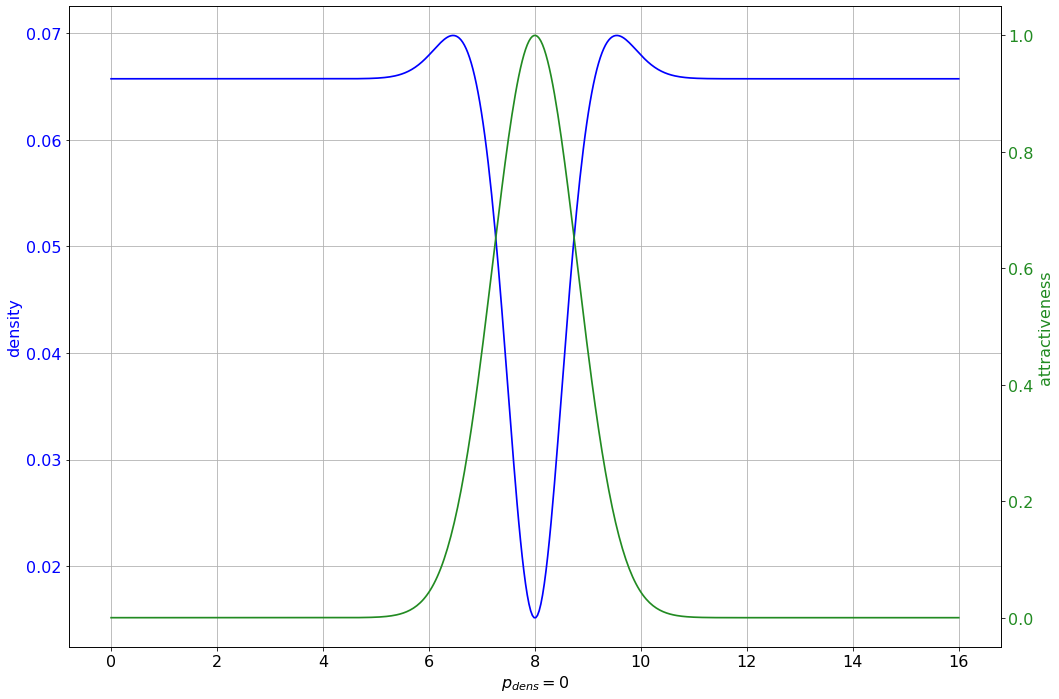

In [7]:
fig1 = plt.figure(f"Solution finale", figsize=(15, 10))
ax1 = fig1.add_subplot(111)


color1 = "blue"
ax1.plot(y, nu * N_POINTS / L_INTERVALLE, label="nu", color=color1, linewidth=1.7)
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xlabel(r"$p_{dens} = $" + f"{PEN_DENSITY}")
ax1.set_ylabel("density", color=color1)

color2 = "forestgreen"
ax2 = ax1.twinx()
ax2.plot(y, attract_y, label="attractiveness", color=color2, linewidth=1.7)
ax2.set_ylabel('attractiveness', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
fig1.tight_layout()

ITER 1
1
evol 187.76937858285837
2
evol 2.704718367646772e-09
3
evol 2.7047183676549493e-09
4
evol 6.687138094355537e-15
5
evol 6.687103274645464e-15
6
evol 2.225399689261176e-19
gap 2 0.7573015086586216
ITER 2
1
evol 187.76937858285837
2
evol 2.704718367646772e-09
3
evol 2.7047183676549493e-09
4
evol 6.687138094355537e-15
5
evol 6.687103274645464e-15
6
evol 2.225399689261176e-19
gap 2 0.0
ITER 1
1
evol 187.76937858285837
2
evol 2.7046370618376825e-08
3
evol 2.7046370618353148e-08
4
evol 6.686749505166057e-13
5
evol 6.686749714239072e-13
6
evol 1.6516877969472587e-17
gap 2 0.7573015086586404
ITER 2
1
evol 187.76937858285837
2
evol 2.7046370618376825e-08
3
evol 2.7046370618353148e-08
4
evol 6.686749505166057e-13
5
evol 6.686749714239072e-13
6
evol 1.6516877969472587e-17
gap 2 0.0
ITER 1
1
evol 187.76937858285837
2
evol 5.4090934591848995e-08
3
evol 5.409093459183579e-08
4
evol 2.6745204666569033e-12
5
evol 2.6745205183974263e-12
6
evol 1.3247322151986998e-16
gap 2 0.7573015086586542
ITE

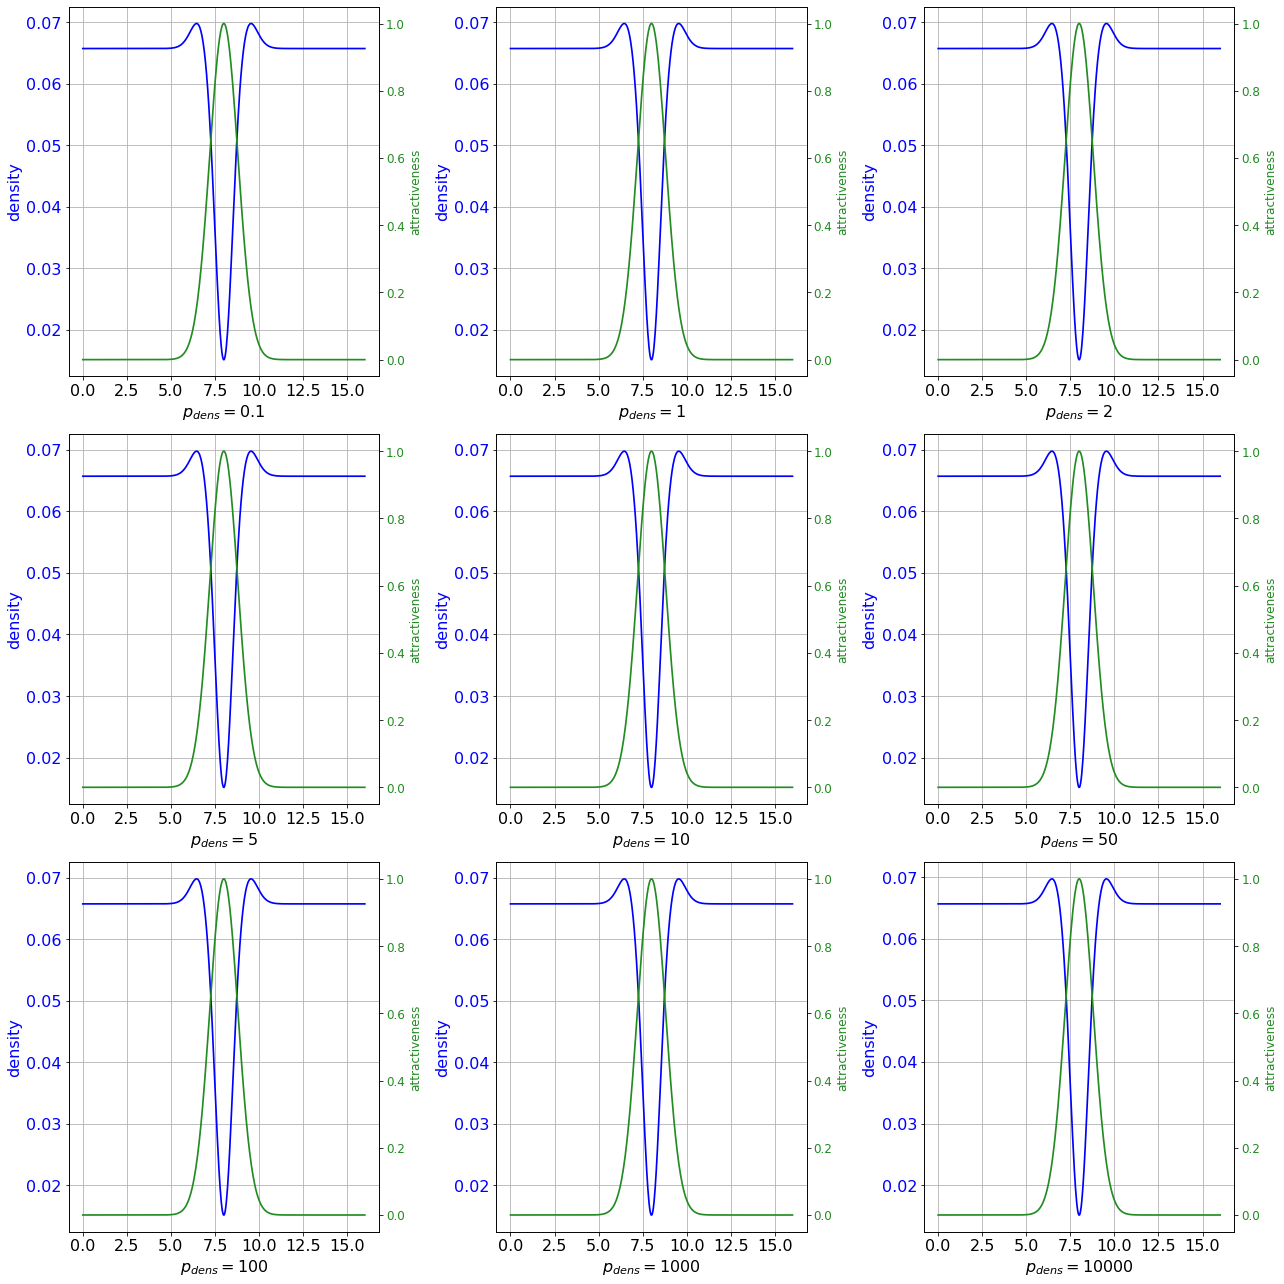

In [8]:
fig, axs = plt.subplots(3, 3, figsize=(18,18))
plt.rc('font', size=12)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

for i, pen_density in enumerate([0.1, 1, 2, 5, 10, 50, 100, 1000, 10000]):
    gamma, nu, mu, x, y, attract_y, costs, phi = ComputeGamma(MAX_ATTRACTIVENESS, 
        REWARD_ATTRACTIVENESS, PEN_OVERCOST, pen_density, PEN_DISTANCE, N_POINTS, EPS, L_INTERVALLE)
    
    ax = axs[i//3, i%3]

    color1 = "blue"
    ax.plot(y, nu * N_POINTS / L_INTERVALLE, label="nu", color=color1, linewidth=1.7)
    ax.grid(True)
    ax.tick_params(axis='y', labelcolor=color1)
    ax.set_xlabel(r"$p_{dens} = $" + f"{pen_density}")
    ax.set_ylabel("density", color=color1)

    color2 = "forestgreen"
    ax2 = ax.twinx()
    ax2.plot(y, attract_y, label="attractiveness", color=color2, linewidth=1.7)
    ax2.set_ylabel('attractiveness', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
    fig.tight_layout()


In [47]:
def ComputeGamma2(pen_mobility, pen_density, pen_distance, n_points, epsilon, l_intervalle):
    x = np.linspace(0, l_intervalle, n_points)
    mu = gaussian(MU_1, SIGMA_1, x) + gaussian(MU_2, SIGMA_2, x)
    mu = (mu / (np.linalg.norm(mu, ord=1))) #+ eps

    # mu = np.ones(x.shape) / x.shape

    y =  np.linspace(0, l_intervalle, n_points) # TODO: tester avec x et y de taille différente
    # attract_y = gaussian(l_intervalle / 2, l_intervalle / 20, y)#gaussian(MU_1, SIGMA_1, y) + gaussian(MU_2, SIGMA_2, y)
    # attract_y = max_attractiveness * attract_y / np.max(attract_y)

    phi = pen_distance * (y.T - y) ** 2

    costs = pen_mobility * (y.reshape(1, -1) - x.reshape(-1, 1)) ** 2

    def E(nu, phi):
        return np.sum( (1/3) * pen_density * (nu ** 3) + 0.5 * nu.T @ phi @ nu)

    #+ np.tile(potential, (x.size, 1))
    def h_G2(nu): # fonction issue du potentiel
        return pen_density * (nu)
    
    def hprim_G2(nu):
        return pen_density

    method = SemiImplicitMethod(mu, costs, phi, epsilon, h_G2, hprim_G2, E)
    gamma, nu = method.fit()
    return gamma, nu, mu, x, y, costs, phi

In [61]:
def ComputeGamma3(pen_mobility, pen_density, pen_distance, n_points, epsilon, l_intervalle):
    x = np.linspace(0, l_intervalle, n_points)
    mu = gaussian(MU_1, SIGMA_1, x) + gaussian(MU_2, SIGMA_2, x)
    mu = (mu / (np.linalg.norm(mu, ord=1))) #+ eps

    # mu = np.ones(x.shape) / x.shape

    y =  np.linspace(0, l_intervalle, n_points) # TODO: tester avec x et y de taille différente
    # attract_y = gaussian(l_intervalle / 2, l_intervalle / 20, y)#gaussian(MU_1, SIGMA_1, y) + gaussian(MU_2, SIGMA_2, y)
    # attract_y = max_attractiveness * attract_y / np.max(attract_y)

    phi = pen_distance * (y.T - y) ** 2

    costs = pen_mobility * (y.reshape(1, -1) - x.reshape(-1, 1)) ** 2

    def E(nu, phi):
        return np.sum( (1/3) * pen_density * (nu ** 3) + 0.5 * nu.T @ phi @ nu)

    #+ np.tile(potential, (x.size, 1))
    def h_G2(nu): # fonction issue du potentiel
        return pen_density * (nu)
    
    def hprim_G2(nu):
        return pen_density

    method = SemiImplicitMethod(mu, costs, phi, epsilon, h_G2, hprim_G2, E)
    gamma, nu = method.fit()
    return gamma, nu, mu, x, y, costs, phi

In [59]:
N_POINTS = 500

## distribution initiale
MU_1 = 4
SIGMA_1 = .7
MU_2 = 12
SIGMA_2 = .7
L_INTERVALLE =16
EPS = 0.1
PREC = 10 ** (-8)
PREC2 = 10 ** (-3)

N_POINTS = 400
L_INTERVALLE =16
EPS = 0.05
PEN_MOBILITY = 1
PEN_DENSITY = 10 ** 7
PEN_DISTANCE = 10 ** (-4)
MAX_ATTRACTIVENESS = 1
REWARD_ATTRACTIVENESS = 2

gamma, nu, mu, x, y, costs, phi = ComputeGamma2(PEN_MOBILITY, PEN_DENSITY, PEN_DISTANCE, N_POINTS, EPS, L_INTERVALLE)

ITER 1
1
evol 52.71334286987272
2
HELLO 5.43831772240305e-06
evol 0.024043073696190576
TEST 0.09378682286405209
3
evol 0.024043073696190576
4
HELLO 5.869098308249276e-11
evol 0.02404291806866252
TEST 0.11250743574721575
5
evol 0.02404291806866252
6
HELLO 9.46501129140115e-16
evol 0.024042781420164056
TEST 0.18908838365712555
gap 2 0.9999998264428185
ITER 2
1
evol 52.71334286987272
2
HELLO 5.43831772240305e-06
evol 0.024043073696190576
TEST 0.09378682286405209
3
evol 0.024043073696190576
4
HELLO 5.869098308249276e-11
evol 0.02404291806866252
TEST 0.11250743574721575
5
evol 0.02404291806866252
6
HELLO 9.46501129140115e-16
evol 0.024042781420164056
TEST 0.18908838365712555
gap 2 0.0


2.6093079320489446e-05

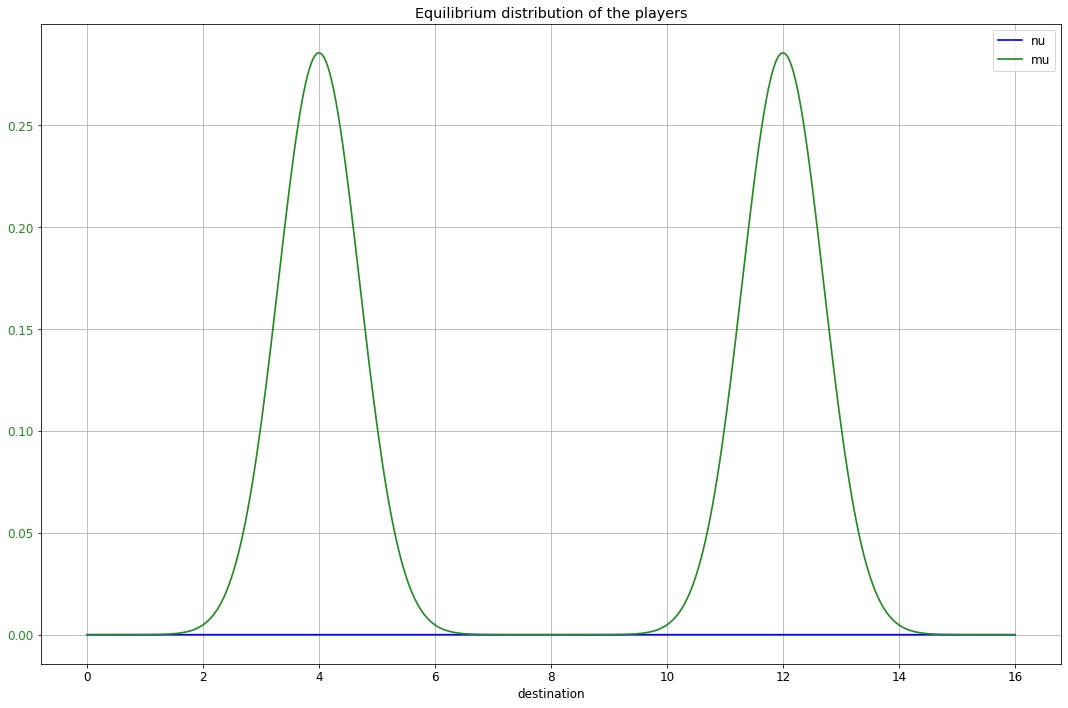

In [60]:
fig1 = plt.figure(f"Solution finale", figsize=(15, 10))
ax1 = fig1.add_subplot(111)

color1 = "blue"
ax1.plot(y, nu * N_POINTS / L_INTERVALLE, label="nu", color=color1, linewidth=1.7)
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xlabel("destination")
ax1.set_ylabel("density", color=color1)
ax1.set_title("Equilibrium distribution of the players")

color2 = "forestgreen"
# ax2 = ax1.twinx()
ax1.plot(y, mu * N_POINTS / L_INTERVALLE, label="mu", color=color2, linewidth=1.7)
ax1.set_ylabel('', color=color2)
ax1.tick_params(axis='y', labelcolor=color2)
ax1.legend()

fig1.tight_layout()
np.sum(gamma)

In [54]:
np.sum(gamma)

0.9831334586687596

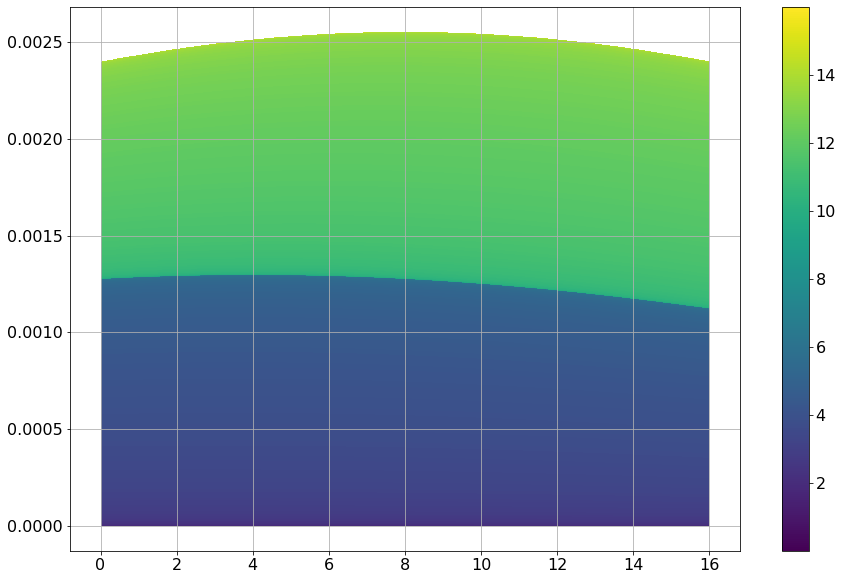

In [7]:
polys = []
values = []
for j, (ys, ye) in enumerate(zip(y[:-1], y[1:])):
    z = np.cumsum(gamma[:, j])
    zp = np.c_[z[:-1], z[:-1], z[1:], z[1:]] #concatenates along the second axis

    yp = np.repeat([[ys, ye, ye, ys]], len(zp), axis=0)
    points = np.dstack((yp, zp))
    polys.append(points)

    values.append(.5 * (x[:-1] + x[1:]))

polys = np.concatenate(polys, 0)
values = np.concatenate(values, 0)

pc = mc.PolyCollection(polys)
pc.set_array(values)

fig, ax = plt.subplots(figsize=(15, 10))
ax.add_collection(pc)
ax.autoscale()    
plt.colorbar(mappable=pc)
plt.grid(True)

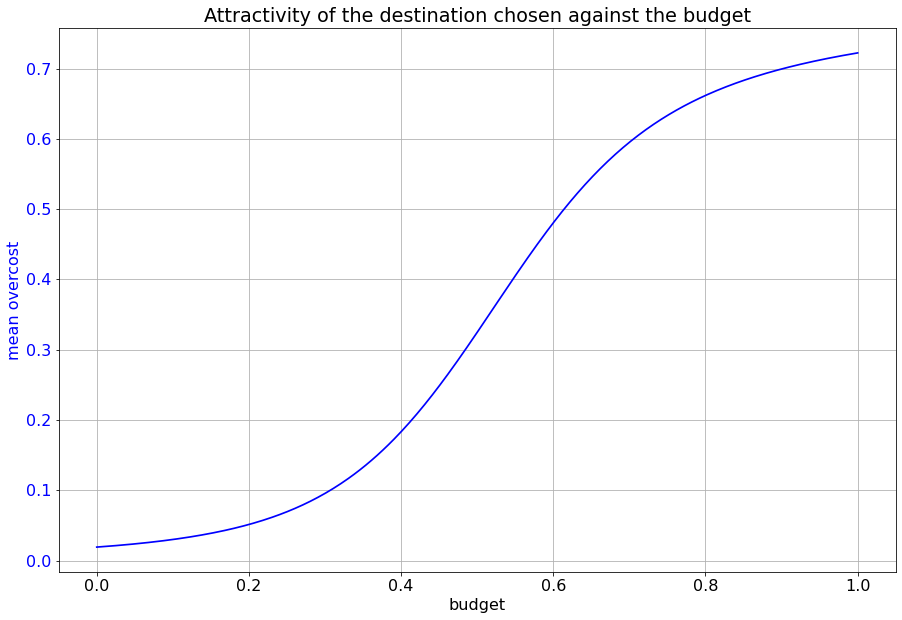

In [7]:
fig2 = plt.figure(f"dépassements de budget", figsize=(15, 10))
ax1 = fig2.add_subplot(111)
#ax1.plot(x, mu * N_POINTS / L_INTERVALLE, label="mu")
#ax1.plot(y, attract_y, label="attractiveness")
color1 = "blue"
# ax1.plot(x, np.sum(gamma * np.where(gap_price_budget < 0, 0, PEN_OVERCOST * gap_price_budget), axis=1), label="nu", color=color1, linewidth=1.7)
# ax1.grid(True)
# ax1.tick_params(axis='y', labelcolor=color1)
# ax1.set_xlabel("budget")
# ax1.set_ylabel("mean overcost", color=color1)
# ax1.set_title("Mean_overcost")

ax1.plot(x, np.sum(gamma * attract_y.reshape(1, -1) / mu, axis=1), label="nu", color=color1, linewidth=1.7)
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xlabel("budget")
ax1.set_ylabel("mean overcost", color=color1)
ax1.set_title("Attractivity of the destination chosen against the budget")

# color2 = "darkorange"
# ax2 = ax1.twinx()
# ax2.plot(x, np.sum(gamma * attract_y.reshape(1, -1), axis=1), label="attractiveness", color=color2, linewidth=1.7)
# ax2.set_ylabel('attractiveness', color=color2)
# ax2.tick_params(axis='y', labelcolor=color2)
# fig1.tight_layout()


plt.show()

# Pénalisation de la densité 

In [8]:
N_POINTS = 400
L_INTERVALLE =16
EPS = 0.05
MAX_ATTRACTIVENESS = 1
REWARD_ATTRACTIVENESS = 2
PEN_OVERCOST = 3
PEN_DENSITY = 0
PEN_DISTANCE = 0

0
ITER 1
ITER 2
1
ITER 1
ITER 2
2
ITER 1
ITER 2
3
ITER 1
ITER 2
4
ITER 1
ITER 2
5
ITER 1
ITER 2
6
ITER 1
ITER 2
7
ITER 1
ITER 2
8
ITER 1
ITER 2


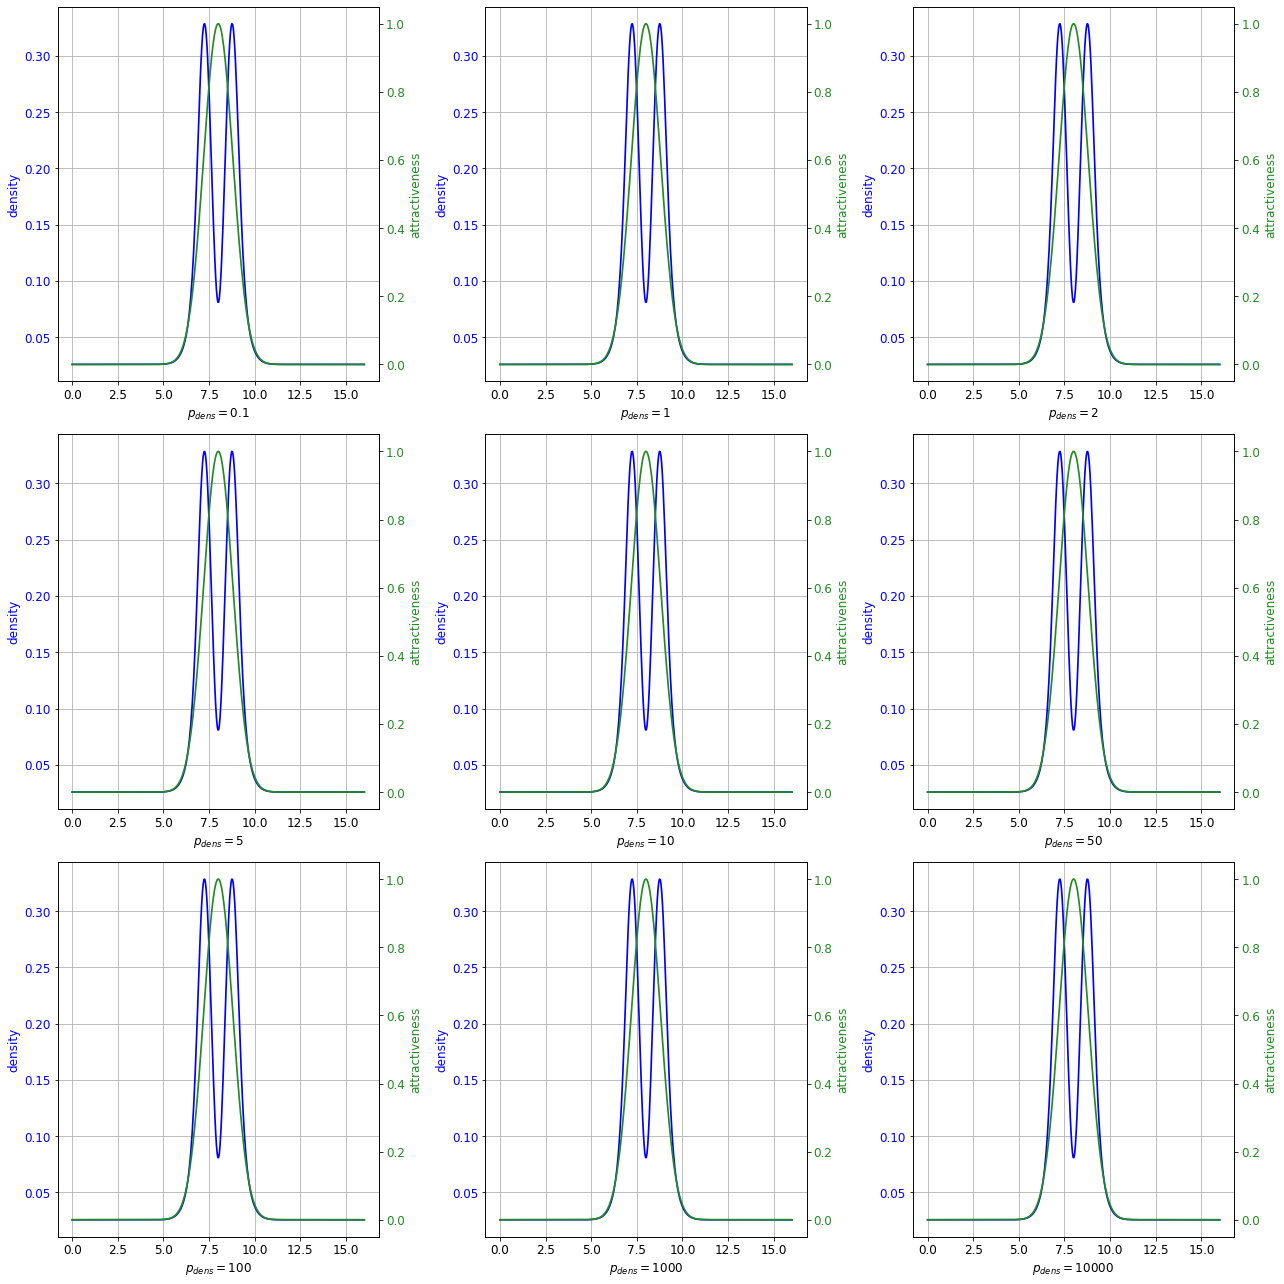

In [49]:
fig, axs = plt.subplots(3, 3, figsize=(18,18))
plt.rc('font', size=12)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

for i, pen_density in enumerate([0.1, 1, 2, 5, 10, 50, 100, 1000, 10000]):
    print(i)
    gamma, nu, mu, x, y, attract_y, costs, phi = ComputeGamma(MAX_ATTRACTIVENESS, 
        REWARD_ATTRACTIVENESS, PEN_OVERCOST, pen_density, PEN_DISTANCE, N_POINTS, EPS, L_INTERVALLE)
    
    ax = axs[i//3, i%3]

    color1 = "blue"
    ax.plot(y, nu * N_POINTS / L_INTERVALLE, label="nu", color=color1, linewidth=1.7)
    ax.grid(True)
    ax.tick_params(axis='y', labelcolor=color1)
    ax.set_xlabel(r"$p_{dens} = $" + f"{pen_density}")
    ax.set_ylabel("density", color=color1)

    color2 = "forestgreen"
    ax2 = ax.twinx()
    ax2.plot(y, attract_y, label="attractiveness", color=color2, linewidth=1.7)
    ax2.set_ylabel('attractiveness', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
    fig.tight_layout()


0
ITER 1
ITER 2
1
ITER 1
ITER 2
2
ITER 1
ITER 2
3
ITER 1
ITER 2
4
ITER 1
ITER 2
5
ITER 1
ITER 2
6
ITER 1
ITER 2
7
ITER 1
ITER 2
8
ITER 1
ITER 2


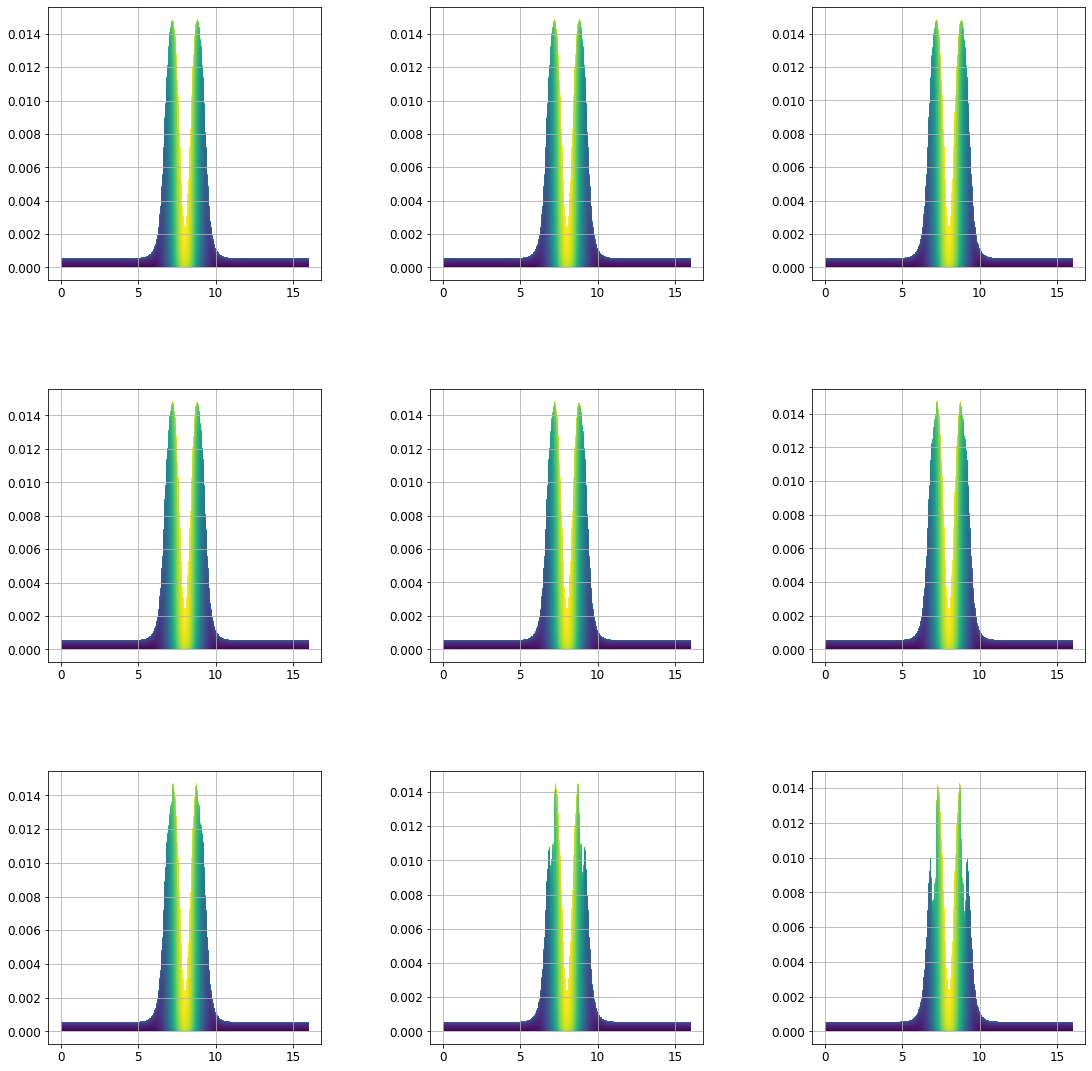

In [10]:
fig, axs = plt.subplots(3, 3, figsize=(18,18))
plt.rc('font', size=12)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

for i, pen_density in enumerate([0.1, 1, 2, 5, 10, 50, 100, 1000, 10000]):
    print(i)
    gamma, nu, mu, x, y, attract_y, costs, phi = ComputeGamma(MAX_ATTRACTIVENESS, 
        REWARD_ATTRACTIVENESS, PEN_OVERCOST, pen_density, PEN_DISTANCE, N_POINTS, EPS, L_INTERVALLE)
    
    ax = axs[i//3, i%3]

    polys = []
    values = []
    for j, (ys, ye) in enumerate(zip(y[:-1], y[1:])):
        z = np.cumsum(gamma[:, j])
        zp = np.c_[z[:-1], z[:-1], z[1:], z[1:]] #concatenates along the second axis

        yp = np.repeat([[ys, ye, ye, ys]], len(zp), axis=0)
        points = np.dstack((yp, zp))
        polys.append(points)

        values.append(.5 * (x[:-1] + x[1:]))

    polys = np.concatenate(polys, 0)
    values = np.concatenate(values, 0)

    pc = mc.PolyCollection(polys)
    pc.set_array(values)

    ax.add_collection(pc)
    ax.autoscale()    
    ax.grid(True)

0
ITER 1
ITER 2
1
ITER 1
ITER 2
2
ITER 1
ITER 2
3
ITER 1
ITER 2
4
ITER 1
ITER 2
5
ITER 1
ITER 2
6
ITER 1
ITER 2
7
ITER 1
ITER 2
8
ITER 1
ITER 2


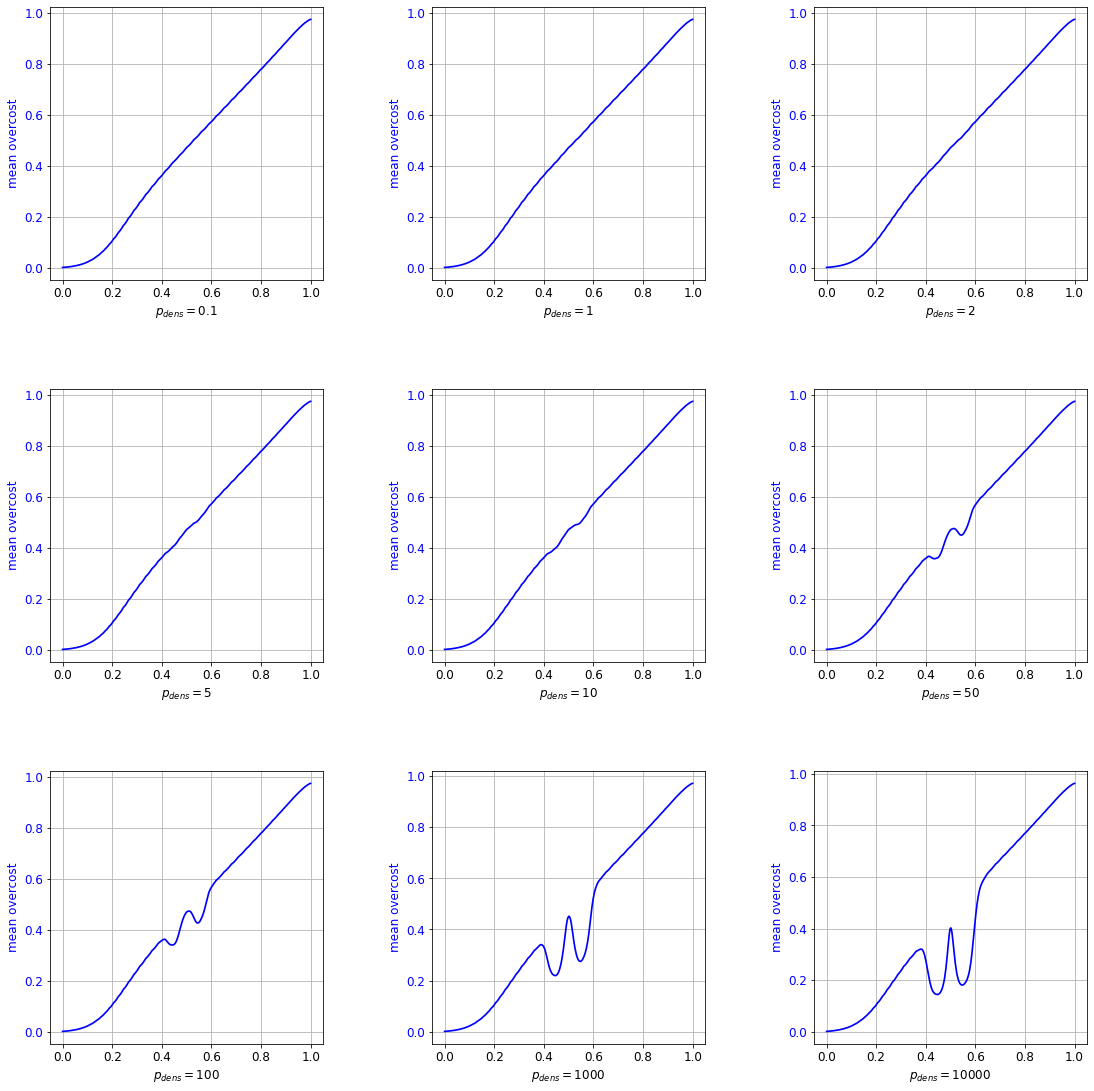

In [11]:
fig, axs = plt.subplots(3, 3, figsize=(18,18))
plt.rc('font', size=12)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

for i, pen_density in enumerate([0.1, 1, 2, 5, 10, 50, 100, 1000, 10000]):
    print(i)
    gamma, nu, mu, x, y, attract_y, costs, phi = ComputeGamma(MAX_ATTRACTIVENESS, 
        REWARD_ATTRACTIVENESS, PEN_OVERCOST, pen_density, PEN_DISTANCE, N_POINTS, EPS, L_INTERVALLE)
    
    ax = axs[i//3, i%3]

    ax.plot(x, np.sum(gamma * attract_y.reshape(1, -1) / mu, axis=1), label="nu", color=color1, linewidth=1.7)
    ax.grid(True)
    ax.tick_params(axis='y', labelcolor=color1)
    ax.set_xlabel("budget")
    ax.set_ylabel("mean overcost", color=color1)
    ax.set_xlabel(r"$p_{dens} = $" + f"{pen_density}")


    plt.grid(True)